<a href="https://colab.research.google.com/github/chenshuo/notes/blob/master/notebooks/DSP_Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital signal processing beginner's labs

Author: Shuo Chen (chenshuo _at_ chenshuo.com)

Latest version: https://github.com/chenshuo/notes/blob/master/notebooks/DSP_Labs.ipynb

Links
* [Allen Downey - Introduction to Digital Signal Processing - PyCon 2018](https://www.youtube.com/watch?v=SrJq2AzXZME)

In [ ]:
# !pip install control

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
# import control

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
def draw_pzmap(dlti):
  plt.plot(np.real(dlti.zeros), np.imag(dlti.zeros), 'o', mfc='none')
  plt.plot(np.real(dlti.poles), np.imag(dlti.poles), 'x')
  w = np.linspace(0, 2*np.pi)
  plt.plot(np.cos(w), np.sin(w), 'y--')
  limits = plt.axis("equal")
  plt.grid()

def draw_resp_stem(x, y):
  plt.stem(x, use_line_collection=True)
  (markerline, _, _) = plt.stem(y, linefmt='r', markerfmt='ro', use_line_collection=True)
  markerline.set_markerfacecolor('none')

# Lab1: Discrete LTI systems

**Weighted Moving Average**

* Memoryless

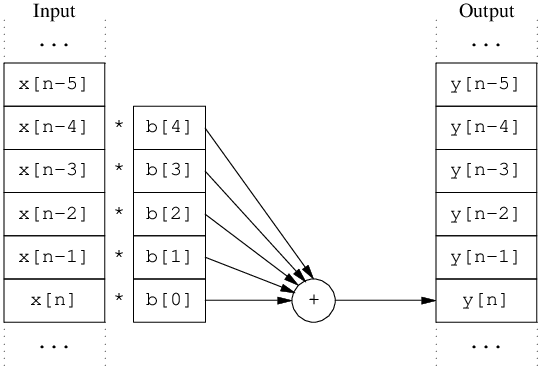

$$\begin{aligned}
  y[n] &= \sum_{i=0}^{L}b[i] x[n-i] \\
       & = b[0]x[n] + b[1]x[n-1] + \cdots + b[L]x[n-L]
\end{aligned} $$

* [scipy.signal.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html), [oaconvolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.oaconvolve.html), [fftconvolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.fftconvolve.html)
* [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html)
* [scipy.signal.dlsim](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlsim.html)
* [scipy.signal.dlti.output](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlti.output.html)
---

In [ ]:
from collections.abc import Sequence

def direct_wma(b : Sequence, x : Sequence) -> Sequence:
  y = np.zeros(len(x))
  x_pad = np.concatenate((np.zeros(len(b)-1), x))
  b_rev = np.array(b[::-1], dtype='d')
  for i in range(len(x)):
    y[i] = np.dot(b_rev, x_pad[i : i + len(b)])
  return y

b = [2, 1]
x = np.arange(10) 
y = direct_wma(b, x)
print(np.array([x, y]).T)

[[ 0.  0.]
 [ 1.  2.]
 [ 2.  5.]
 [ 3.  8.]
 [ 4. 11.]
 [ 5. 14.]
 [ 6. 17.]
 [ 7. 20.]
 [ 8. 23.]
 [ 9. 26.]]


In [ ]:
b = [2, 1]
x = np.arange(10, dtype='d')
y = signal.lfilter(b, [1], x)
print(np.array([x, y]).T)

[[ 0.  0.]
 [ 1.  2.]
 [ 2.  5.]
 [ 3.  8.]
 [ 4. 11.]
 [ 5. 14.]
 [ 6. 17.]
 [ 7. 20.]
 [ 8. 23.]
 [ 9. 26.]]


**Recursive, or ladder**

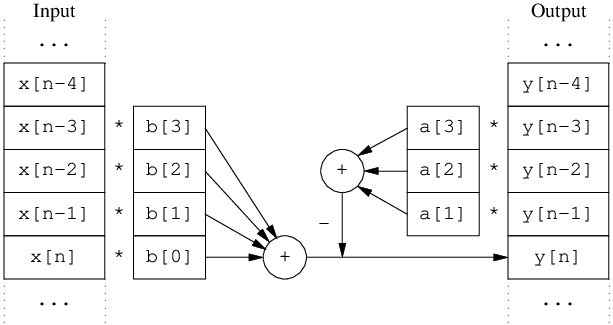

$$\begin{aligned}
y[n] = &\sum_{i=0}^{L}b[i]x[n-i] - \sum_{i=1}^{M}a[i\,]y[n-i\,] \\
 = & \  b[0]x[n] + b[1]x[n-1] + \cdots + b[L]x[n-L] \\
        &-(a[1]y[n-1]+a[2]y[n-2]+\cdots+a[M]y[n-M])
\end{aligned}$$

* [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html)
* [scipy.signal.dlsim](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlsim.html)
* [scipy.signal.dlti.output](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlti.output.html)

What if `x` is *Iterable*, not *Sequence*?

Realtime DSP.

In [ ]:
# Pseudo code only

def iterative_dlti(b : list, a : list, x_in : Iterable) -> Iterable:
  x_vec = np.zeros(len(b))  # circular buffer
  y_vec = np.zeros(len(a))  # circular buffer
  for u in x_in:
    # update x_vec
    yn = np.dot(x_vec, b) - np.dot(y_vec, a)
    # update y_vec
    yield yn

for y in iterative_dlti(b, a, x):
  output(y)

## Moving average

Julius O. Smith, _Introduction to Digital Filters with Audio Applications_, http://ccrma.stanford.edu/~jos/filters/

Chapter 1: https://ccrma.stanford.edu/~jos/filters/Simplest_Lowpass_Filter.html

$y[n] = \frac{1}{2}x[n]+\frac{1}{2}x[n-1]$

In [ ]:
b = [1/2, 1/2]

x = np.arange(11)
y = signal.lfilter(b, [1], x)  # or signal.convolve(b, x)
print(np.array([x, y]).T)

[[ 0.   0. ]
 [ 1.   0.5]
 [ 2.   1.5]
 [ 3.   2.5]
 [ 4.   3.5]
 [ 5.   4.5]
 [ 6.   5.5]
 [ 7.   6.5]
 [ 8.   7.5]
 [ 9.   8.5]
 [10.   9.5]]


[scipy.signal.dlti](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlti.html) Discrete-time linear time invariant system 

Zeros: [-1.]
Poles: []


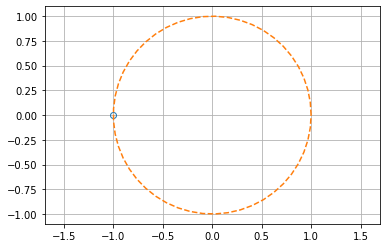

In [ ]:
dlti = signal.dlti(b, [1])
print('Zeros:', dlti.zeros)
print('Poles:', dlti.poles)
draw_pzmap(dlti)

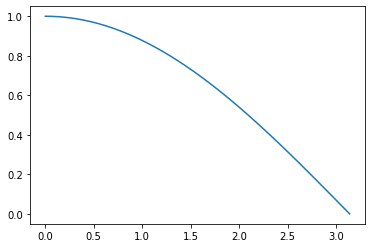

In [ ]:
w, mag = dlti.freqresp()
plt.plot(w, np.abs(mag))

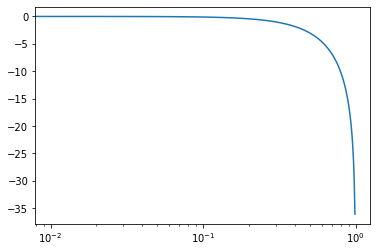

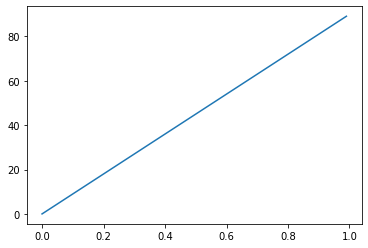

In [ ]:
w, mag, phase = dlti.bode()
plt.semilogx(w/np.pi, mag)
plt.figure(2)
plt.plot(w/np.pi,phase)

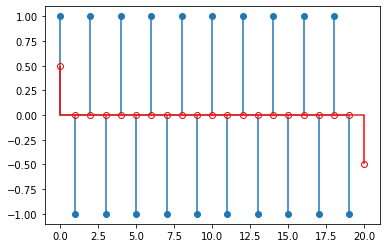

In [ ]:
w = np.arange(20) * np.pi
x = np.cos(w)  # [1, -1, 1, -1, 1, -1, ...]
y = np.convolve(b, x)

plt.stem(x, use_line_collection=True)
plt.stem(y, linefmt='r', markerfmt='ro', use_line_collection=True)

In [10]:
@interact(f = (0, 1, 0.02))
def resp(f = 0.02):
  t = np.linspace(0, 1, 101)
  x = np.cos(t * 2*np.pi * f * 100)
  plt.plot(t, x)
  y = signal.lfilter([1/2, 1/2], [1], x)
  plt.plot(t, y)
  plt.show()

interactive(children=(FloatSlider(value=0.02, description='f', max=1.0, step=0.02), Output()), _dom_classes=('…

**n = 3**

$y[n] = \frac{1}{3}x[n] + \frac{1}{3}x[n-1] + \frac{1}{3}x[n-2]$

min_mag = -84.37 dB


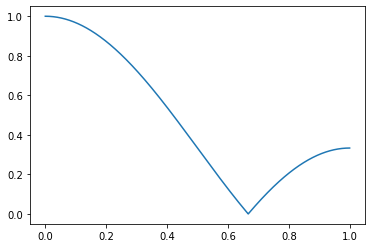

In [ ]:
b3 = [1/3, 1/3, 1/3]
dlti3 = signal.dlti(b3, [1])

w, mag = dlti3.freqresp()
plt.plot(w/np.pi, np.abs(mag))
print('min_mag = %.2f dB' % (20 * np.log10(np.min(np.abs(mag)))))

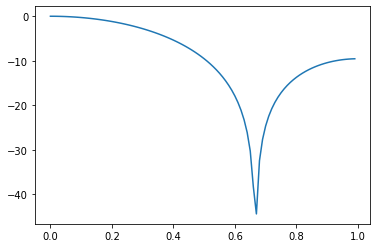

In [ ]:
w, mag, phase = dlti3.bode()
plt.plot(w/np.pi, mag)

[ 120. -120.]


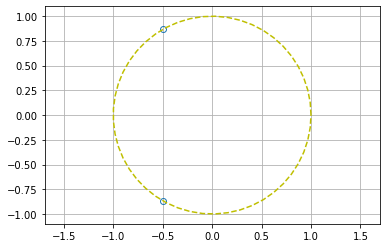

In [ ]:
draw_pzmap(dlti3)
print(np.angle(dlti3.zeros)/np.pi*180)

[ 1.  -0.5 -0.5  1.  -0.5 -0.5  1.  -0.5 -0.5  1. ]


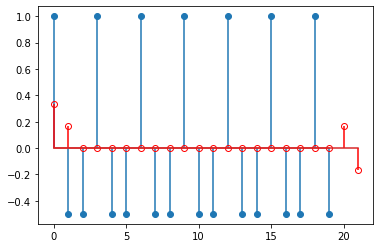

In [ ]:
t = np.arange(20)
x = np.cos(t * 2/3 * np.pi)
y = np.convolve(x, b3)

draw_resp_stem(x, y)
print(x[0:10])

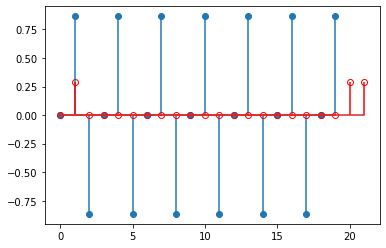

In [ ]:
t = np.arange(20)
x = np.sin(t * 2/3 * np.pi)
y = np.convolve(x, b3)
draw_resp_stem(x, y)

# x = [1, -1, 0, 1, -1, 0, 1, -1, 0, 1]

In [ ]:
@interact(phase=(0, 90, 5))
def resp(phase=0):
  t = np.arange(15)
  x = np.cos(t * 2/3 * np.pi - phase / 180 * np.pi)
  y = signal.lfilter(b3, [1], x)
  plt.stem(t, x, use_line_collection=True)
  t1 = np.arange(141) / 10
  plt.plot(t1, np.cos(t1 * 2/3 * np.pi - phase / 180 * np.pi), 'y--')
  (markerline, stemlines, baseline) = plt.stem(t, y, linefmt='r', markerfmt='ro', use_line_collection=True)
  markerline.set_markerfacecolor('none')

interactive(children=(IntSlider(value=0, description='phase', max=90, step=5), Output()), _dom_classes=('widge…

**n = 4**

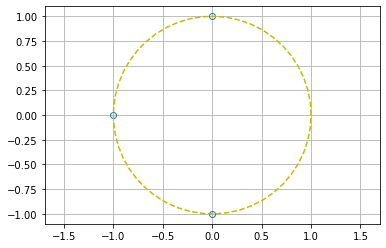

In [12]:
b4 = np.ones(4) / 4.0
dlti4 = signal.dlti(b4, [1])
draw_pzmap(dlti4)

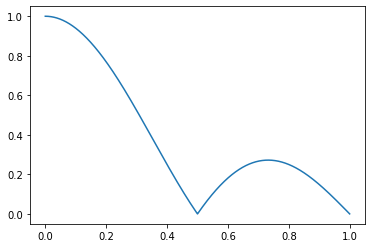

In [ ]:
w, mag = dlti4.freqresp()
plt.plot(w/np.pi, np.abs(mag))

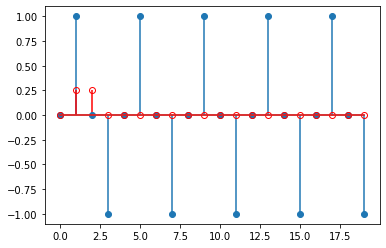

In [ ]:
x = np.array([0, 1, 0, -1] * 5)
y = signal.lfilter(b4, [1], x)

draw_resp_stem(x, y)

In [13]:
@interact(phase=(0, 90, 5))
def resp(phase=0):
  t = np.arange(16)
  x = np.cos(t * 1/2 * np.pi - phase / 180 * np.pi)
  y = signal.lfilter(b4, [1], x)
  plt.stem(t, x, use_line_collection=True)
  t1 = np.arange(151) / 10
  plt.plot(t1, np.cos(t1 * 1/2 * np.pi - phase / 180 * np.pi), 'y--')
  (markerline, stemlines, baseline) = plt.stem(t, y, linefmt='r', markerfmt='ro', use_line_collection=True)
  markerline.set_markerfacecolor('none')

interactive(children=(IntSlider(value=0, description='phase', max=90, step=5), Output()), _dom_classes=('widge…

## Differentiator

$y[n]=x[n]-x[n-1]$

In [ ]:
bd = [1, -1]
x = np.arange(10, dtype='d')  ** 2 
y = signal.lfilter(bd, [1], x)
print(x)
print(y)

[ 0.  1.  4.  9. 16. 25. 36. 49. 64. 81.]
[ 0.  1.  3.  5.  7.  9. 11. 13. 15. 17.]


Zeros: [1.]
Poles: []


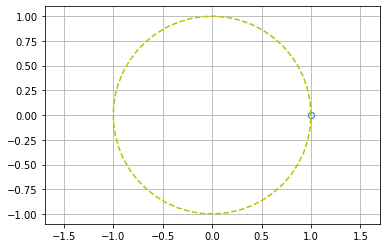

In [ ]:
dlti = signal.dlti(bd, [1])
zeros = dlti.zeros
print('Zeros:', zeros)
print('Poles:', dlti.poles)
draw_pzmap(dlti)

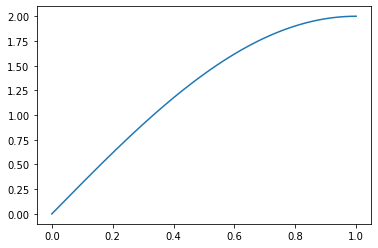

In [ ]:
w, mag = dlti.freqresp()
plt.plot(w/np.pi, np.abs(mag))

## Recursive

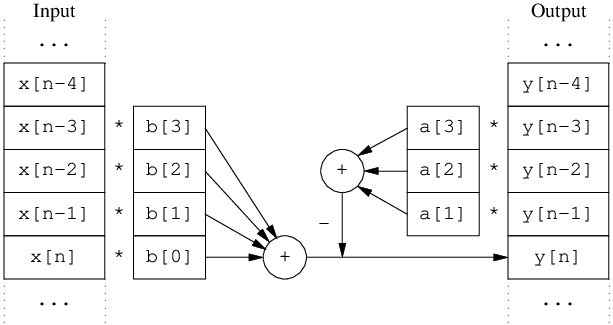

$$y[n] = \sum_{i=0}^{L}b[i]x[n-i] - \sum_{i=1}^{M}a[i]y[n-i]$$

### Accumulator, integrator

$y[n] = x[n] + y[n-1]$

$H(z)=\dfrac{1}{1-z^{-1}}$

In [ ]:
b = [1]
a = [1, -1]
x = np.arange(11)*1.0
print(x)
y = signal.lfilter(b, a, x=x)
print(y)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0.  1.  3.  6. 10. 15. 21. 28. 36. 45. 55.]


模拟反向积分器

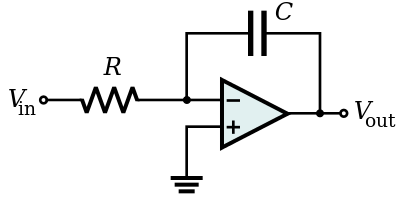

$$V_\text{out}(t_1) = V_\text{out}(t_0) - \frac{1}{RC} \int_{t_0}^{t_1} V_\text{in}(t) \,dt$$

### Saving account

$y[n] = x[n] + a y[n-1]$

**零状态响应**

年息 1.2%，月息 0.1%，每月存 1000。$a = 1+ 1.2\% / 12 = 1.001$

In [ ]:
rate = 1.2
a = 1.0 + rate / 100 / 12

x = np.ones(12) * 1000
y = signal.lfilter([1], [1, -a], x)
print(np.array([x, np.round(y, 2)]).T)

[[ 1000.    1000.  ]
 [ 1000.    2001.  ]
 [ 1000.    3003.  ]
 [ 1000.    4006.  ]
 [ 1000.    5010.01]
 [ 1000.    6015.02]
 [ 1000.    7021.04]
 [ 1000.    8028.06]
 [ 1000.    9036.08]
 [ 1000.   10045.12]
 [ 1000.   11055.17]
 [ 1000.   12066.22]]


**零输入响应**

年息 1.2%，月息 0.1%，起始存款 10000。

In [ ]:
rate = 1.2
a = 1.0 + rate / 100 / 12
y0 = 10000.0

x = np.zeros(13) * 0.0
y, yn = signal.lfilter([1], [1, -a], x, zi=[y0])
np.set_printoptions(suppress=True)
print(np.array([np.arange(len(x)), np.round(y, 2)]).T)
# print('yn =', np.round(yn, 2))

[[    0.   10000.  ]
 [    1.   10010.  ]
 [    2.   10020.01]
 [    3.   10030.03]
 [    4.   10040.06]
 [    5.   10050.1 ]
 [    6.   10060.15]
 [    7.   10070.21]
 [    8.   10080.28]
 [    9.   10090.36]
 [   10.   10100.45]
 [   11.   10110.55]
 [   12.   10120.66]]


**完全响应**

贷款 20000，年息 3.5%，分 24 期（2 年）偿还，每月还款 864.06。

$p = L\dfrac{c(1+c)^n}{(1+c)^n-1}$, $L=20\,000$, $n = 24$, $c = 3.5\%/12$.

In [ ]:
L = 20000
n = 24
rate = 3.5
c = rate / 100 / 12
p = L * c * np.power(1+c, n) / (np.power(1+c, n) - 1)
print('Monthly payment: %.4f' % p)

Monthly payment: 864.0544


In [ ]:
rate = 3.5
a = 1.0 + rate / 100 / 12
y0 = 20000.0

x = np.concatenate(([0.0], np.ones(24) * -864.06))
y, yn = signal.lfilter([1], [1, -a], x, zi=[y0])
np.set_printoptions(suppress=True)
print(np.array([np.arange(len(x)), np.round(y, 2)]).T)
print('yn =', np.round(yn, 2))

[[    0.   20000.  ]
 [    1.   19194.28]
 [    2.   18386.22]
 [    3.   17575.79]
 [    4.   16763.01]
 [    5.   15947.85]
 [    6.   15130.31]
 [    7.   14310.39]
 [    8.   13488.08]
 [    9.   12663.37]
 [   10.   11836.26]
 [   11.   11006.73]
 [   12.   10174.78]
 [   13.    9340.41]
 [   14.    8503.6 ]
 [   15.    7664.35]
 [   16.    6822.66]
 [   17.    5978.51]
 [   18.    5131.89]
 [   19.    4282.81]
 [   20.    3431.25]
 [   21.    2577.21]
 [   22.    1720.68]
 [   23.     861.65]
 [   24.       0.11]]
yn = [0.11]


### Exponential moving average

$y[n] = ax[n]+(1-a)y[n-1]$

In [14]:
@interact(a=(0.1, 0.9, 0.1))
def ema(a):
  dlti = signal.dlti([a], [1, a-1])
  t, imp = dlti.impulse()
  plt.stem(t, imp[0], use_line_collection=True)
  plt.figure(2)
  t, step = dlti.step()
  plt.stem(t, step[0], use_line_collection=True)

interactive(children=(FloatSlider(value=0.5, description='a', max=0.9, min=0.1), Output()), _dom_classes=('wid…

In [ ]:
@interact(a=(0.1, 0.9, 0.1))
def ema(a):
  dlti = signal.dlti([a], [1, a-1])
  draw_pzmap(dlti)
  plt.figure(2)
  w, mag = dlti.freqresp()
  plt.plot(w/np.pi, np.abs(mag))
  plt.ylim(0, 1.1)

interactive(children=(FloatSlider(value=0.5, description='a', max=0.9, min=0.1), Output()), _dom_classes=('wid…

**How does TCP calculates RTT**

* [RFC793](https://www.rfc-editor.org/rfc/rfc793) Transmission Control Protocol, 1981 Sept.
* [Jacobson88](https://ee.lbl.gov/papers/congavoid.pdf) Congestion Avoidance and Control, 1988 Nov.
* [RFC1122](https://www.rfc-editor.org/rfc/rfc1122.html) 1989 Oct.
* [RFC2988](https://www.rfc-editor.org/rfc/rfc2988.html) 2000 Nov.
* [RFC6298](https://www.rfc-editor.org/rfc/rfc6298.html) Computing TCP's Retransmission Timer, 2011 June.

**RFC 793**

$$newRTT = \alpha \cdot oldRTT + (1-\alpha) \cdot newRTTsample$$

$$\alpha = 0.9$$

$$y[n] = \alpha \cdot y[n-1] + (1-\alpha) x[n]$$

I found a typo in RFC793 in 2020-10. https://www.rfc-editor.org/errata/eid6305

**RFC 6298**

```
   (2.2) When the first RTT measurement R is made, the host MUST set

            SRTT <- R
            RTTVAR <- R/2
            RTO <- SRTT + max (G, K*RTTVAR)

         where K = 4.

   (2.3) When a subsequent RTT measurement R' is made, a host MUST set

            RTTVAR <- (1 - beta) * RTTVAR + beta * |SRTT - R'|
            SRTT <- (1 - alpha) * SRTT + alpha * R'

         The value of SRTT used in the update to RTTVAR is its value
         before updating SRTT itself using the second assignment.  That
         is, updating RTTVAR and SRTT MUST be computed in the above
         order.

         The above SHOULD be computed using alpha=1/8 and beta=1/4 (as
         suggested in [JK88]).

         After the computation, a host MUST update
         RTO <- SRTT + max (G, K*RTTVAR)
```

$$SRTT \gets (1-\alpha)\cdot SRTT + \alpha \cdot Rsample $$

$$\alpha = \frac{1}{8}$$

$$y[n] = \alpha x[n] + (1-\alpha) y[n-1]$$

### Second order digital sinusoidal oscillator

$y[n]=2\cos(w)y[n-1]-y[n-2]$

Digital resonator
https://ccrma.stanford.edu/~jos/pdf/GordonAndSmith86.pdf

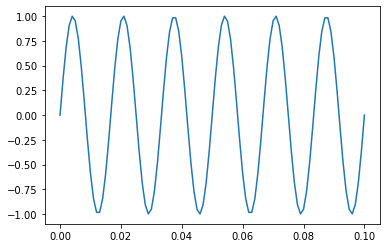

In [4]:
fs = 1000
f = 60
w = 2*np.pi*f/fs
c = np.cos(w)
a = [1, -2*c, 1]
n = 101
x = np.zeros(n) * 0.0
y0 = np.sin(w)
y, yn = signal.lfilter([1], a, x, zi=[0, y0])
t = np.arange(n)/fs
plt.plot(t, y)

In [5]:
print(max(y), min(y))

0.9980267284282738 -0.9980267284282742


In [ ]:
w=2*np.pi*30/1000
c = np.cos(w)
c2=1/(np.exp(1j*w)-np.exp(3j*w))
c1=-c2*np.exp(4j*w)
print(w)
print(c1, c2)
print(np.abs(c1)*2)

In [ ]:
w=2*np.pi*30/1000
c = (np.exp(1j*w)-np.exp(3j*w))
print(c, np.abs(c) )

Why not use `sin()`/`cos()`?

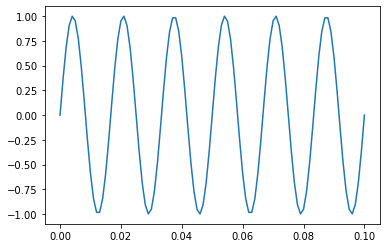

In [6]:
fs = 1000
f = 60
n = 101
t = np.arange(n) / fs
y1 = np.sin(2 * np.pi * f * t)
plt.plot(t, y1)

In [8]:
print(y - y1)
print(sum(y-y1))

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.33066907e-16  6.66133815e-16  1.22124533e-15  1.38777878e-15
  1.72084569e-15  1.41553436e-15  1.66533454e-15  9.99200722e-16
  5.55111512e-16 -4.44089210e-16 -1.11022302e-15 -1.66533454e-15
 -2.60902411e-15 -3.30291350e-15 -1.88737914e-15 -1.66533454e-15
 -8.88178420e-16  6.66133815e-16  1.88737914e-15  2.77555756e-15
  4.71844785e-15  4.62860957e-15  3.83026943e-15  2.55351296e-15
  1.11022302e-15 -3.33066907e-16 -1.77635684e-15 -3.88578059e-15
 -4.66293670e-15 -4.80171458e-15 -5.96744876e-15 -4.55191440e-15
 -1.66533454e-15 -1.11022302e-16  1.88737914e-15  3.66373598e-15
  6.43929354e-15  7.24420524e-15  6.99440506e-15  4.21884749e-15
  3.88578059e-15  9.99200722e-16 -7.77156117e-16 -3.55271368e-15
 -6.88338275e-15 -6.49480469e-15 -8.25801842e-15 -5.49560397e-15
 -5.10702591e-15 -1.55431223e-15  7.77156117e-16  4.21884749e-15
  5.88418203e-15  8.77076189e-15  1.09634524e-14  8.32667268e-15
  4.88498131e-15  3.44169

## Summary

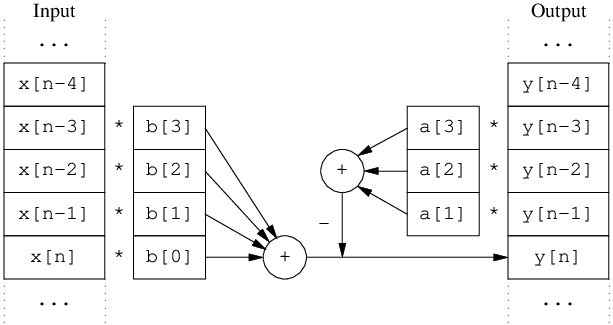

$$\begin{aligned}
y[n] = &\sum_{i=0}^{L}b[i]x[n-i] - \sum_{i=1}^{M}a[i\,]y[n-i\,] \\
 = & \  b[0]x[n] + b[1]x[n-1] + \cdots + b[L]x[n-L] \\
        &-(a[1]y[n-1]+a[2]y[n-2]+\cdots+a[M]y[n-M])
\end{aligned}$$

# Lab2: Frequency Analysis

## DTMF


|        | 1209 Hz | 1336 Hz | 1447 Hz |
| -----: | :-----: | :-----: | :-----: |
| 697 Hz |  **1**  |  **2**  |  **3**  |
| 770 Hz |  **4**  |  **5**  |  **6**  |
| 852 Hz |  **7**  |  **8**  |  **9**  |
| 941 Hz |  **$*$** |  **0**  |  **#**  |


In [ ]:
freqs = np.array([697, 770, 852, 941, 1209, 1336, 1447])
np.diff(freqs)


array([ 73,  82,  89, 268, 127, 111])

freqs * 1.035

In [ ]:
@interact(nfft = (60, 250, 5))
def how_many_bins(nfft=105):
  sr = 8000
  t = np.arange(nfft)/sr
  x = np.sin(2*np.pi* freqs.reshape(len(freqs), 1) * t)
  print('%.2f' % (sr / nfft))
  for i in x:
    fft = np.fft.rfft(i)
    plt.plot(np.abs(fft[0:(nfft//4)])/nfft)


interactive(children=(IntSlider(value=105, description='nfft', max=250, min=60, step=5), Output()), _dom_class…

### Goertzel algorithm
https://en.wikipedia.org/wiki/Goertzel_algorithm

$y[n]=x[n]+2\cos(\omega)y[n-1]-y[n-2]$

$\omega = \dfrac{2\pi k} { N}$

In [ ]:
N = 205
sr = 8000
print('%.2f Hz' % (sr / N))

k = np.array([18, 20, 22, 24, 31, 34, 37])
k * sr / N - freqs 

39.02 Hz


array([ 5.43902439, 10.48780488,  6.53658537, -4.41463415,  0.75609756,
       -9.17073171, -3.09756098])

In [ ]:
N = 205
sr = 8000
t = np.arange(N) / sr
x = np.cos(t * 2 * np.pi * 697)

bin = 18
fft = np.fft.rfft(x)
print('fft:', fft[bin])

wk = np.exp(1j * bin * 2 * np.pi * np.arange(N) / N)
dft = np.vdot(wk, x)
print('dft:', dft)
print('diff:', dft - fft[bin])



fft: (89.75850817734614-42.23143015507722j)
dft: (89.75850817734626-42.231430155077035j)
diff: (1.1368683772161603e-13+1.8474111129762605e-13j)


In [ ]:
s2 = 0
s1 = 0
s0 = 0
w = bin * 2 * np.pi / N
c = np.cos(w)
c2 = 2 * c
# print(c)
for p in x:
  s0 = p + c2 * s1 - s2
  s2 = s1
  s1 = s0
# s0 = c * s1
#print(s2)
goert = s2-np.exp(-1j*w) * s1

print(dft) 
print(goert)
print(np.real(dft) + np.real(goert), (np.imag(dft) - np.imag(goert)))

power = s1 * s1 + s2 * s2 - c2 * s1 * s2

print(power)
print(np.real_if_close(dft * dft.conj()))

(89.75850817734626-42.231430155077035j)
(-89.75850817734629-42.231430155076346j)
-2.842170943040401e-14 -6.892264536872972e-13
9840.083483165832
9840.083483165885


### Real world requirements

https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling

https://web.archive.org/web/20110925184759/http://nemesis.lonestar.org/reference/telecom/signaling/dtmf.html

DTMF receiver chips:
* CM8870CSI (obsoleted) by California Micro Devices Corp. 215 Topaz Street, Milpitas, California  95035
* MT8870D from Zarlink (active)
 


## Spectrogram

# Lab3: Filtering

https://github.com/chipmuenk/pyfda

## Review DLTI

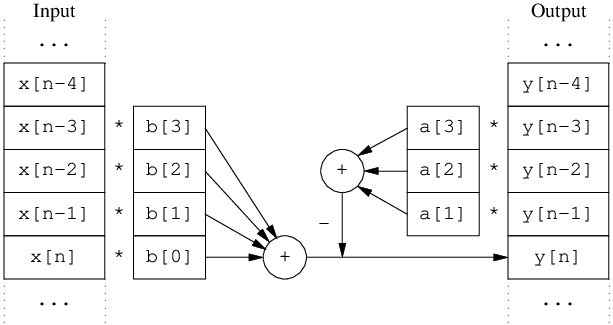

$$\begin{aligned}
y[n] &= \sum_{i=0}^{L}b_ix[n-i\,] - \sum_{i=1}^{M}a_iy[n-i\,] \\
     &=  \  b_0x[n] + b_1x[n-1] + \cdots + b_Lx[n-L] \\
     & \quad   -(a_1y[n-1]+a_2y[n-2]+\cdots+a_My[n-M])\\[3mm]
H(z) &= \frac{\sum_{i=0}^{L}b_iz^{-i}}{1+ \sum_{i=1}^{M}a_iz^{-i}} \\
     &= \frac{b_0 + b_1z^{-1}+b_2z^{-2}+\cdots+b_Lz^{-L}}{1+a_1z^{-1}+a_2z^{-2}+\cdots+a_Mz^{-M}}\\[3mm]
H(z) &= K\frac{\Pi_i}{\Pi_{i=1}^M}
\end{aligned}$$


## OpenAirIR

## FIR using Remez

## IIR Notch
https://www.mathworks.com/help/signal/ug/remove-the-60-hz-hum-from-a-signal.html

In [ ]:
fs=1000
b, a = signal.iirnotch(60, Q=30, fs=fs)
print('b=', np.round(b, 5))
print('a=', np.round(a, 5))

b= [ 0.99376 -1.84794  0.99376]
a= [ 1.      -1.84794  0.98751]


Sophocles J. Orfanidis. _Introduction to Signal Processing, 1996._ 

§11.3 Second-Order Peaking and Notching Filters

https://www.ece.rutgers.edu/~orfanidi/intro2sp/



$y[n] = 0.99376\,x[n] - 1.84794\,x[n-1] + 0.99376\,x[n-2] + 1.84794\,y[n-1] - 0.98751\,y[n-2]$

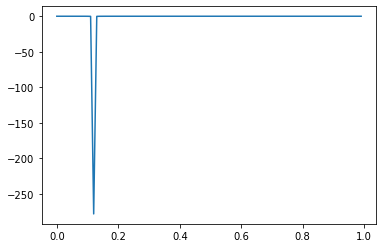

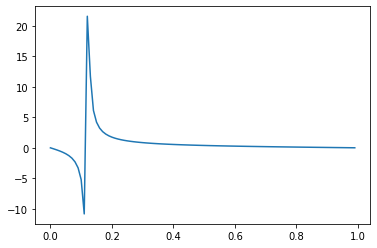

In [ ]:
d = signal.dlti(b, a)
w, mag, phase = d.bode()
plt.plot(w/np.pi, mag)
plt.figure()
plt.plot(w/np.pi, phase)

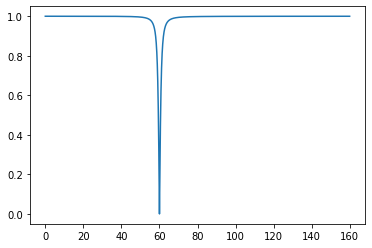

In [ ]:
w, amp = d.freqresp()
w=w[0:3200]
amp=amp[0:3200]
plt.plot(w/(2*np.pi)*fs, np.abs(amp))

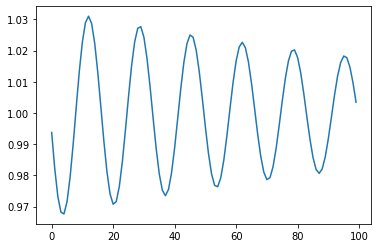

In [ ]:
t, y = d.impulse()
plt.plot(t, y[0])

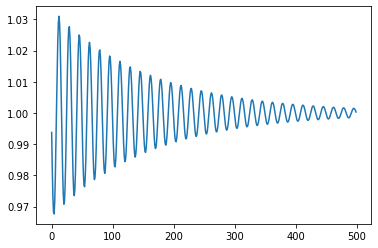

In [ ]:
t, y = d.step(n=500)
plt.plot(t, y[0])

zeros 1.00000 60.0000Hz
poles 0.99374 59.9921Hz


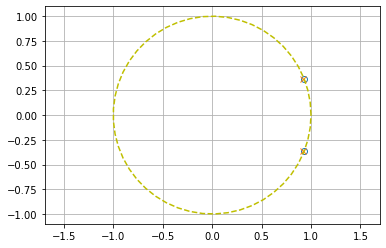

In [ ]:
print('zeros %.5f %.4fHz' % (np.abs(d.zeros[0]), np.angle(d.zeros[0]) * fs / (2*np.pi)))
print('poles %.5f %.4fHz' % (np.abs(d.poles[0]), np.angle(d.poles[0]) * fs / (2*np.pi)))
draw_pzmap(d)

**EEG**

# Lab4: Sampling, alias, modulation

https://www.youtube.com/watch?v=2wO8ZHnn3Q4 Hamming

https://www.engr.colostate.edu/ECE423/course_info.shtml DSP for Communications,

# Lab5: Advanced

https://en.wikipedia.org/wiki/Audio_time_stretching_and_pitch_scaling

## Heartbeat rate from camera